## **Table of Contents**
1. [Problem definition](#problem-definition)
2. [Acquiring and loading the data set](#acquiring-and-loading-the-data-set)
3. [Storing the information](#storing-the-information)
4. [Performing a descriptive analysis](#performing-a-descriptive-analysis)
5. [Performing a full EDA](#performing-a-full-eda)
6. [Building the model and optimizing it](#building-the-model-and-optimizing-it)
7. [Deploying the model](#deploying-the-model)

## **Problem definition**


Suggest or recommend products to customers based on various criteria, including past purchases, demographic information, and other factors.


## **Acquiring and loading the data set**

In [1]:
import pandas as pd

data = pd.read_csv("/workspaces/Final-project-Product-recommendation/src/new_retail_data.csv")
data.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## **Storing the information**

In [2]:
import sqlite3

# Connecting to the SQLite database
conn = sqlite3.connect('retail_data.db')

cursor = conn.cursor()

# Creating the table (if not exists)
cursor.execute('''
CREATE TABLE IF NOT EXISTS retail_data (
   Transaction_ID INTEGER,
   Customer_ID INTEGER,
   Name TEXT,
   Email TEXT,
   Phone INTEGER,
   Address TEXT,         
   City TEXT,
   State TEXT,
   Zipcode INTEGER,
   Country TEXT,
   Age INTEGER,
   Gender TEXT,
   Income REAL,
   Customer_Segment TEXT,
   Date TEXT,
   Year INTEGER,
   Month INTEGER,
   Time TEXT,
   Total_Purchases INTEGER,
   Amount REAL,
   Total_Amount REAL,
   Product_Category TEXT,
   Product_Brand TEXT,
   Product_Type TEXT,
   Feedback TEXT,
   Shipping_Method TEXT,
   Payment_Method TEXT,
   Order_Status TEXT,
   Ratings REAL,
   products TEXT
)
''')
   
# Commit changes
conn.commit()

# Inserting data from the pandas DataFrame into the SQLite table
data.to_sql('retail_data', conn, if_exists='replace', index=False)

# Query the table
query = "SELECT * FROM retail_data"
df = pd.read_sql_query(query, conn)

df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


## **Performing a descriptive analysis**

In [3]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [4]:
# Calculating the mode of variables
modes = df.mode().iloc[0]
print(modes)

Transaction_ID                        6145934.0
Customer_ID                             47382.0
Name                              Michael Smith
Email                       Michael59@gmail.com
Phone                              1001893927.0
Address             0008 Raymond Club Suite 857
City                                    Chicago
State                                   England
Zipcode                                 68029.0
Country                                     USA
Age                                        20.0
Gender                                     Male
Income                                   Medium
Customer_Segment                        Regular
Date                                 11/22/2023
Year                                     2023.0
Month                                     April
Time                                   15:54:27
Total_Purchases                             5.0
Amount                                10.144057
Total_Amount                          10

**Analysis of the descriptive statistical variables:**

1) Measures of Central Tendency

**Mean:**

Age: The average age of customers is 35.48 years.
Total Purchases: The average total purchases made by person is 5.35.
Total Amount: The average total amount spent per transaction is $1367.65
Ratings: The average rating of products purchased is 3.16.

**Median (50th percentile):**

Age: The median age of customers is 32 years.
Total Purchases: The median total purchases made by person is 5.
Total Amount: The median total amount spent per transaction is $1041.11.
Ratings: The median rating of products purchased is 3.


2) Measures of Dispersion

**Standard Deviation:**

Age: The standard deviation of age is 15, indicating that there is a wide range of ages among the customers.
Total Purchases: The standard deviation of total purchases is 2.86, showing a significant variation in customer total purchases.
Total Amount: The standard deviation of the total amount is $1128.99, indicating variability in the amounts spent.
Ratings: The standard deviation of ratings is 1.32, indicating variability in the ratings of products purchased.

**Range:**

Age: The ages range from 18 to 70 years.
Total Purchases: The total purchases range from 1 to 10.
Total Amount: The total amounts spent range from $10 to $4999.62.
Ratings: The ratings of products purchased ranges from 1 to 5.

## **Performing a full EDA**

In [5]:
# Exploration and data cleaning

df.shape # Dimensions

(302010, 30)

In [6]:
# Information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

There are a total of 302010 rows (in this case, transactions) and 30 columns, among which we find the target or class to predict or recommend, products.
Almost all variables contain some null values that are not so significant.
The data has 10 numerical characteristics and 20 categorical characteristics.


In [7]:
# Eliminating duplicates
df.drop("Transaction_ID", axis = 1).duplicated().sum()

np.int64(4)

In [8]:
# There are four duplicates in the column Transaction_ID that have to be eliminated
df = df.drop_duplicates(subset = df.columns.difference(['Transaction_ID']))
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [9]:
# Eliminating irrelevant information (the following features are not essential to make a prediction)
df.drop(["Customer_ID", "City", "State", "Name", "Email", "Phone", "Address", "Zipcode", "Time", "Date", "Year", "Month", "Total_Amount", "Product_Type"], axis = 1, inplace = True)
df.head()

,Transaction_ID,Country,Age,Gender,Income,Customer_Segment,Total_Purchases,Amount,Product_Category,Product_Brand,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,Germany,21.0,Male,Low,Regular,3.0,108.028757,Clothing,Nike,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,UK,19.0,Female,Low,Premium,2.0,403.353907,Electronics,Samsung,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,Australia,48.0,Male,Low,Regular,3.0,354.477600,Books,Penguin Books,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,Canada,56.0,Male,High,Premium,7.0,352.407717,Home Decor,Home Depot,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,UK,22.0,Male,Low,Premium,2.0,124.276524,Grocery,Nestle,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


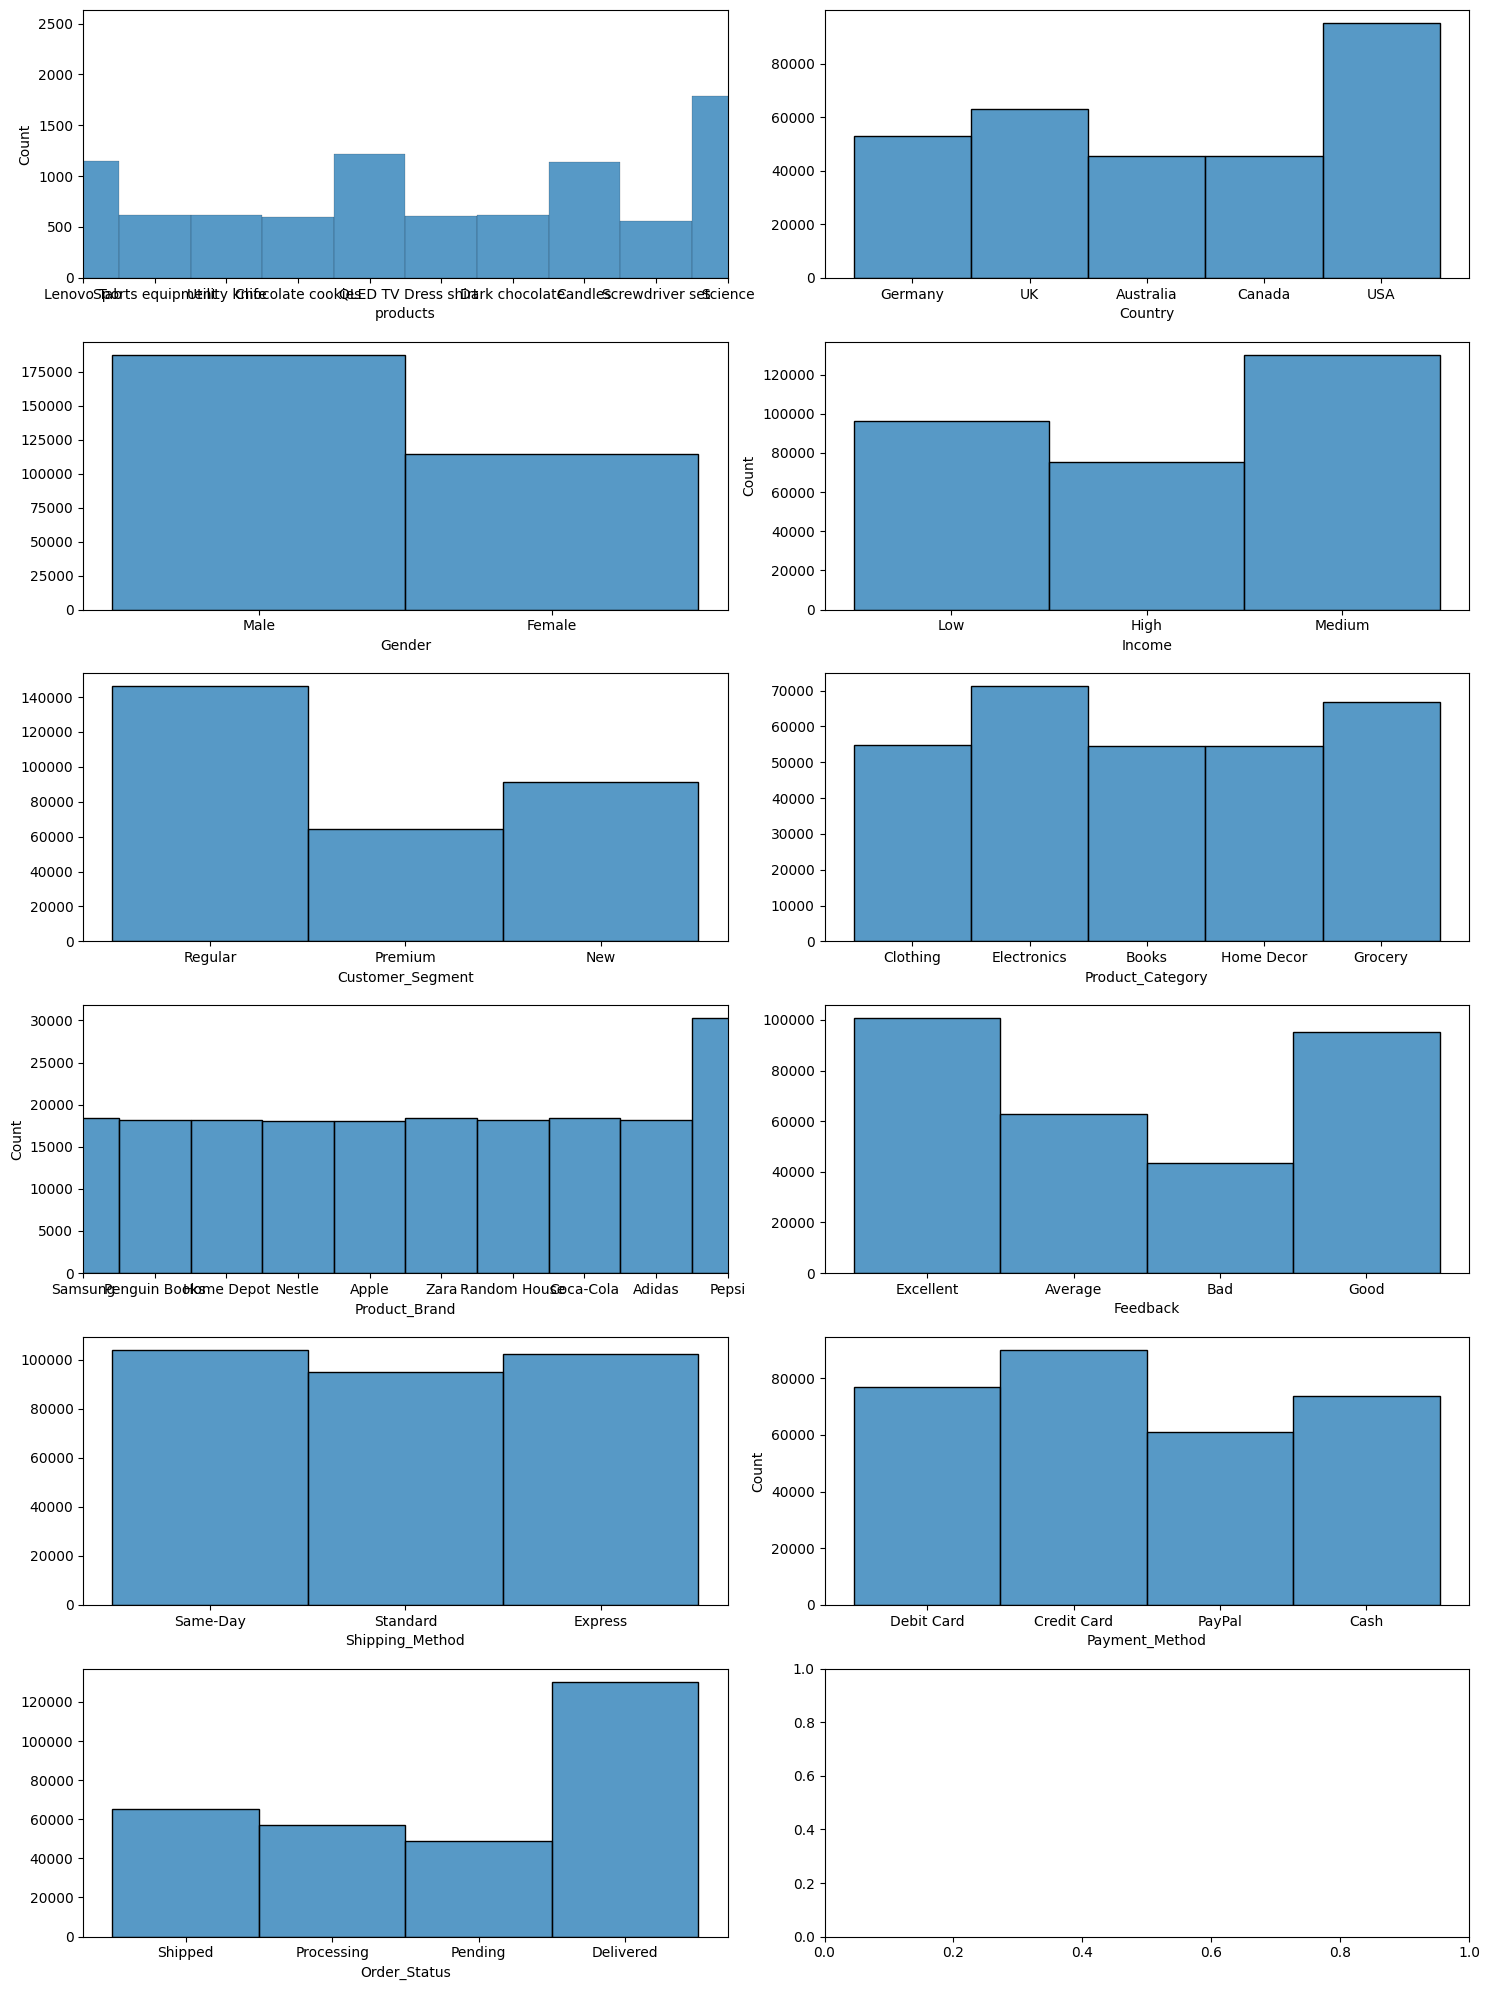

In [10]:
# Analysis of univariate (categorical) variables

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(6, 2, figsize = (15, 20))

# Creating a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "products")
axis[0, 0].set_xlim(1, 10) 
sns.histplot(ax = axis[0, 1], data = df, x = "Country").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "Gender").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "Income")
sns.histplot(ax = axis[2, 0], data = df, x = "Customer_Segment").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "Product_Category").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "Product_Brand")
axis[3, 0].set_xlim(1, 10)
sns.histplot(ax = axis[3, 1], data = df, x = "Feedback").set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = df, x = "Shipping_Method").set(ylabel = None)
sns.histplot(ax = axis[4, 1], data = df, x = "Payment_Method")
sns.histplot(ax = axis[5, 0], data = df, x = "Order_Status").set(ylabel = None)

plt.tight_layout()

plt.show()

**Conclucions of the univariate analysis of (categorical) variables**

By looking at the histograms, we can see that:

**Products**: the most popular item to order is water (spring, boottled, artesian and distilled) while the least popular item is package AC.

**Country**: the majority of the customers are from the USA; UK and Germany are the next most popular countries, and the smallest groups of customers are from Australia and Canada. 

There are almost twice as many men as women making transactions.

Most transactions correspond to the middle-income customers, whereas low income-customers are the second group and high income-customers tend to  make less transactions.

**Customer segment**: the biggest group of customers represents the regular customer segment, almost half of the customers belong to a new segment, whereas the premium segment is the smallest group.

**Product category**: there are five categories, being the two most popular electronics and grocery; clothing, books and home decor are equally in demand.

**Product brand**: Pepsi is the most common product brand, the rest of the brands are equally in demand with the least demanded brands such as: Whirepool, Mitsubhisi and BlueStar.

**Feedback**: most of the customers are satisfied with a product or service, however, there are some that left a negative feedback.

**Shipping method**: there is no big difference in the shipping methods, being "same-day" and "express" shipping slightly more popular than the "standard" method.

**Payment method**: people use more credit cards than debit.

**Order status**: orders are mainly delivered, however, there are some of them with the status shipped, processing or pending, that likely depends on the date of order.


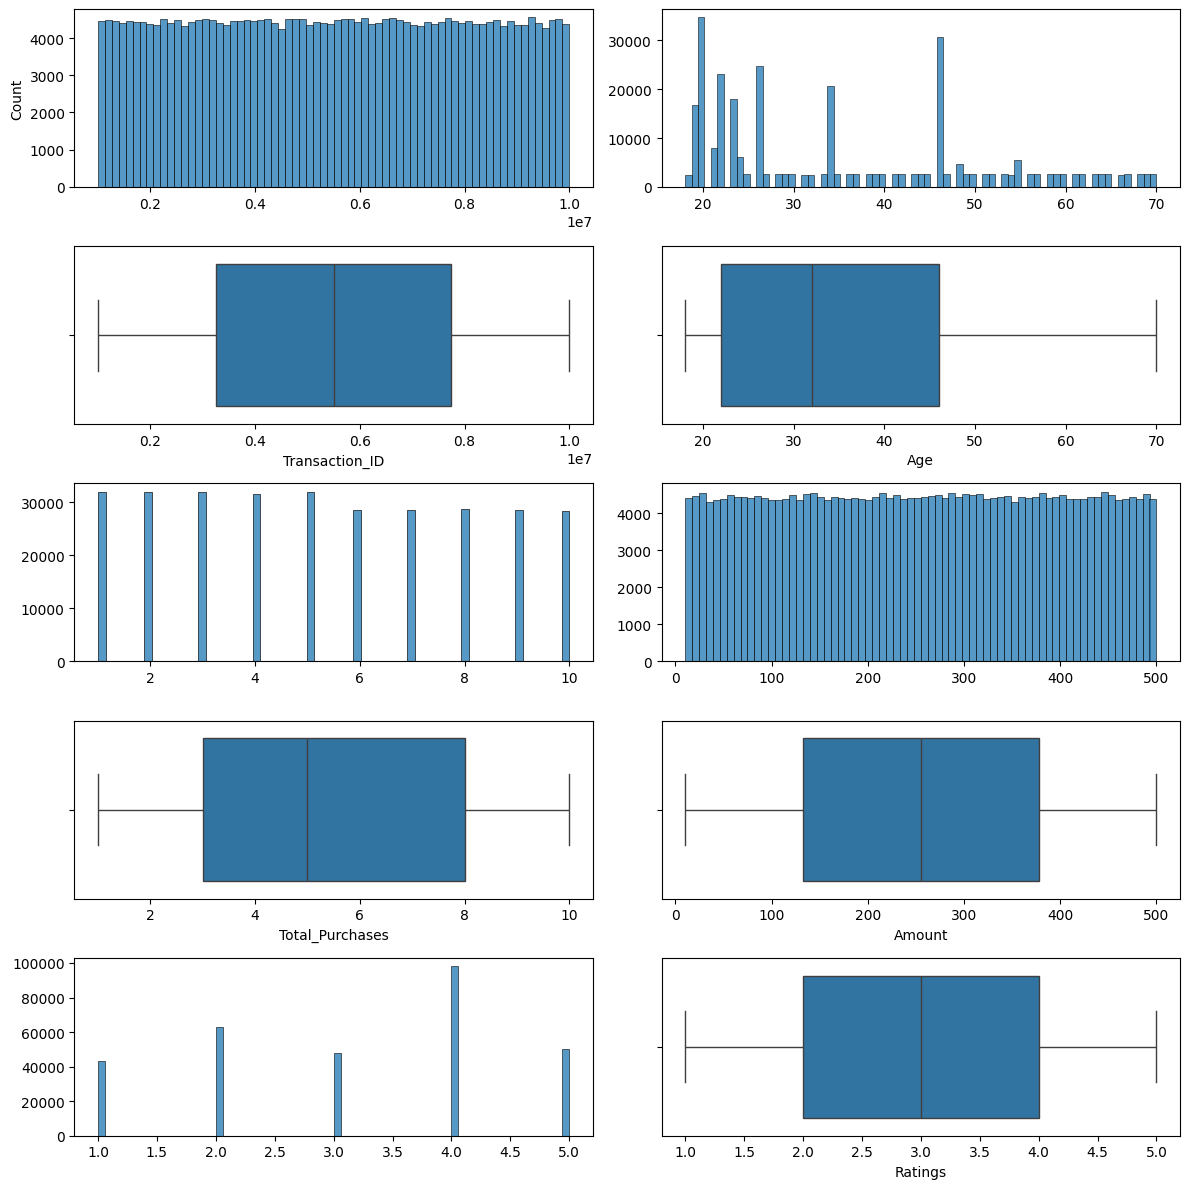

In [11]:
# Analysis of univariate (numeric) variables
fig, axis = plt.subplots(5, 2, figsize = (12, 12))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "Transaction_ID").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Transaction_ID")
sns.histplot(ax = axis[0, 1], data = df, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "Age")
sns.histplot(ax = axis[2, 0], data = df, x = "Total_Purchases").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "Total_Purchases")
sns.histplot(ax = axis[2, 1], data = df, x = "Amount").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "Amount")
sns.histplot(ax = axis[4, 0], data = df, x = "Ratings").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[4, 1], data = df, x = "Ratings")

plt.tight_layout()

plt.show()

From the resulting visualisation, we can see that there is **no outliers**.

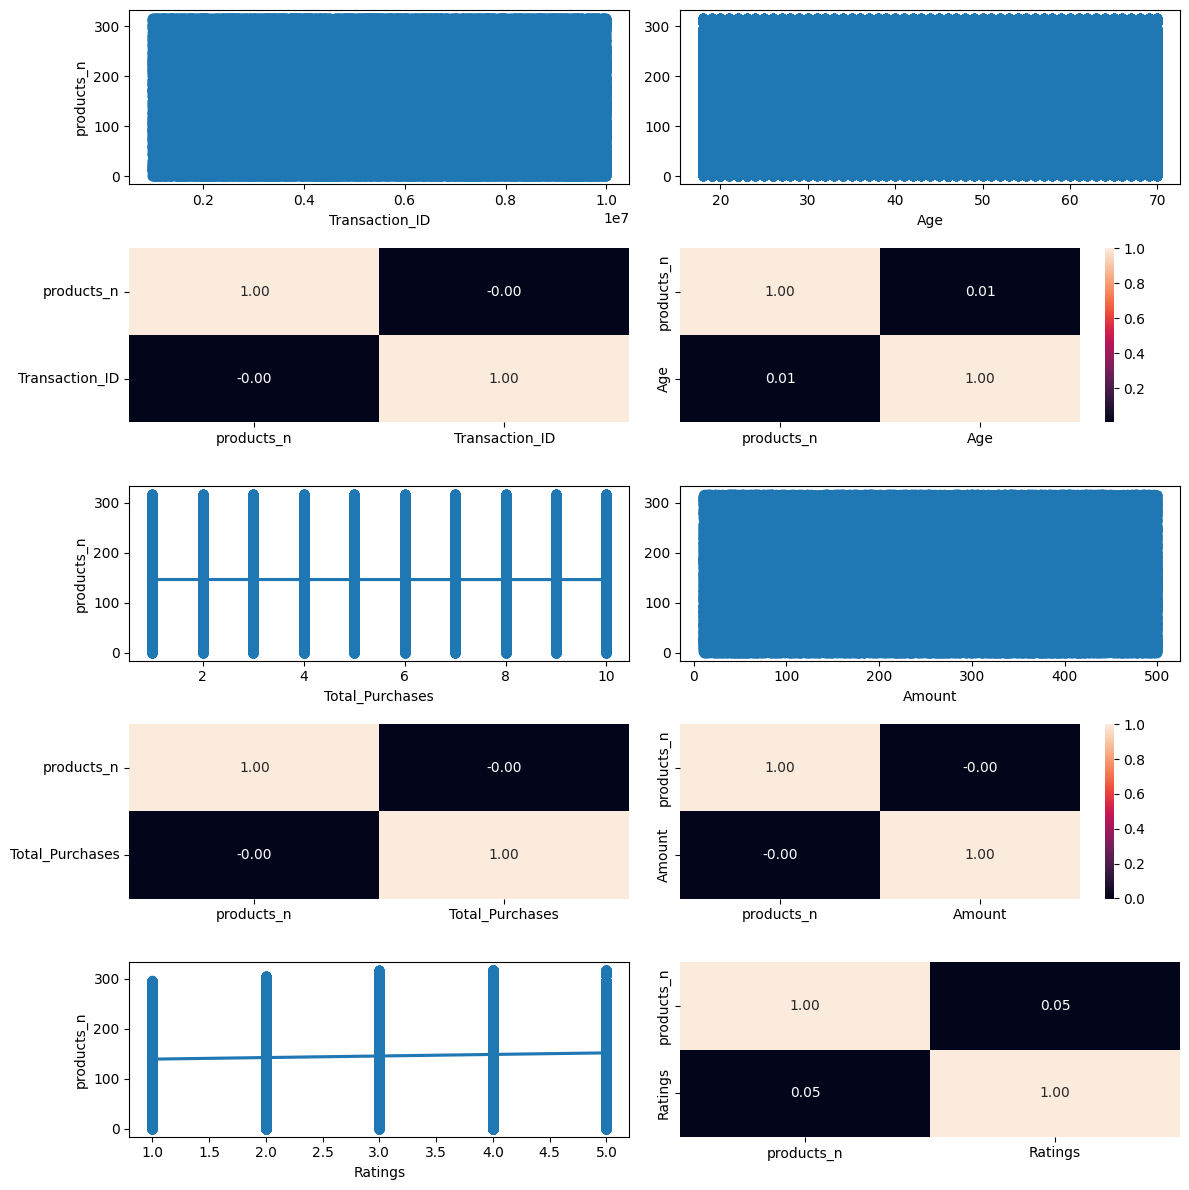

In [12]:
# Analysis of multivariate variables (numerical-numerical analysis)

fig, axis = plt.subplots(5, 2, figsize = (12, 12))
df["products_n"], unique_products = pd.factorize(df["products"])

# Creating a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "Transaction_ID", y = "products_n")
sns.heatmap(df[["products_n", "Transaction_ID"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "Age", y = "products_n").set(ylabel=None)
sns.heatmap(df[["products_n", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "Total_Purchases", y = "products_n")
sns.heatmap(df[["products_n", "Total_Purchases"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)
sns.regplot(ax = axis[2, 1], data = df, x = "Amount", y = "products_n").set(ylabel=None)
sns.heatmap(df[["products_n", "Amount"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[4, 0], data = df, x = "Ratings", y = "products_n")
sns.heatmap(df[["products_n", "Ratings"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1], cbar = False)

plt.tight_layout()

plt.show()

**Conclusions of the numerical-numerical analysis**

There is a weak direct relationship between ratings and products. Thus, products with high ratings are more likely to be bought. The rest of the variables do not affect the target variable. 

In summary, despite there being some very weak relationship between these characteristics versus the predictor, the significance is very low, not being decisive factors on whether a product will be bought or not.


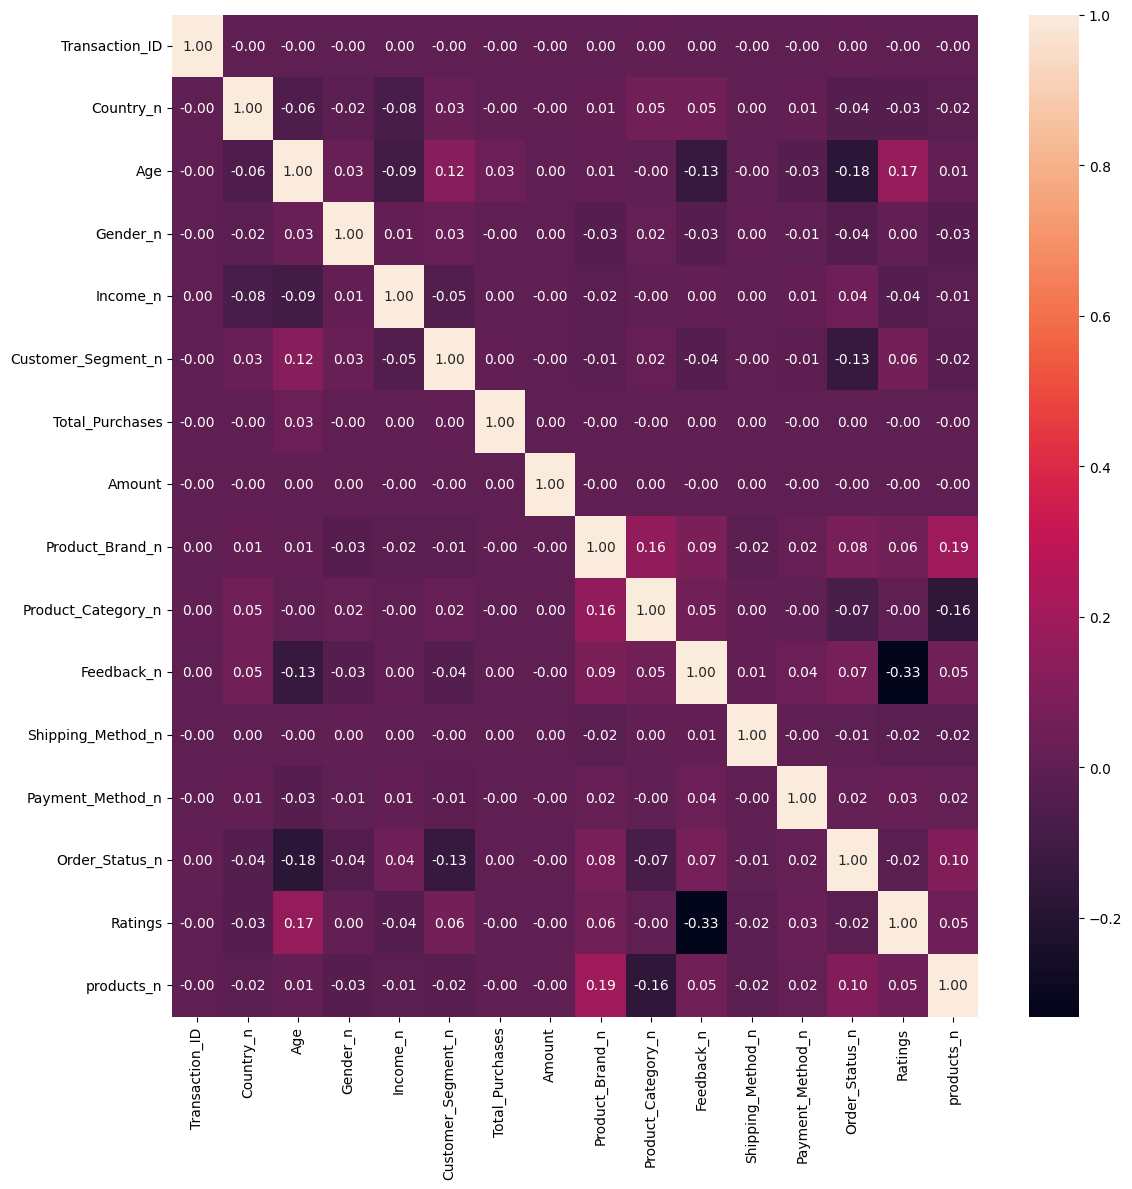

In [13]:
#Correlation analysis
#Numerical-categorical analysis (complete)

# Factorizing columns with categorical data 
df["Country_n"] = pd.factorize(df["Country"])[0]
df["Gender_n"] = pd.factorize(df["Gender"])[0]
df["Income_n"] = pd.factorize(df["Income"])[0]
df["Customer_Segment_n"] = pd.factorize(df["Customer_Segment"])[0]
df["Product_Category_n"] = pd.factorize(df["Product_Category"])[0]
df["Product_Brand_n"] = pd.factorize(df["Product_Brand"])[0]
df["Feedback_n"] = pd.factorize(df["Feedback"])[0]
df["Shipping_Method_n"] = pd.factorize(df["Shipping_Method"])[0]
df["Payment_Method_n"] = pd.factorize(df["Payment_Method"])[0]
df["Order_Status_n"] = pd.factorize(df["Order_Status"])[0]

fig, axis = plt.subplots(figsize = (12, 12))

sns.heatmap(df[["Transaction_ID", "Country_n", "Age", "Gender_n", "Income_n", "Customer_Segment_n", "Total_Purchases", "Amount",
				"Product_Brand_n", "Product_Category_n", "Feedback_n", "Shipping_Method_n", "Payment_Method_n", "Order_Status_n", "Ratings", "products_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**Conclusions of the correlation analysis**:

There is a negative relationship between **Country and Customer Age** as well as between **Country and Income**, thus, in certain countries customers are more likely to have a high income than in other countries, the same with the Age, customers of one country tend to be younger than customers of others. 


We can observe a positive relationship between **Age and Customer Segment**, which makes a lot of sense, the older the customer the higher the probability that he/she belongs to the premium segment.


There is a negative relationship between **Age and Feedback**, and positive relationship between Age and Ratings, thus, older customers tend to leave more positive feedback and give higher ratings.


**Customer Segment with Ratings** have a positive relationship: newly arrived customers are likely to receive better service, as a marketing ploy to attract customers and convert them into their clients, as a result, they are more satisfied giving better ratings. Here also can be included **Order Status** for different customer segments.


**Product Brand correlates with Feedback, Order Status and Ratings** in a positive way. Famous and recognised brands, such as Apple, Adidas, etc. have good reputation with mostly positive feedback and high ratings. Moreover, they try to deliver the best customer service (f.e. on-time delivery). 


There is a negative relationship between **Feedback and Ratings**, thus, the higher the ratings the more positive feedback the product receives.


The rest of the correlations remain the same as previously seen.


In [14]:
# Feature engineering
# Missing value analysis
variables = ["Transaction_ID", "Country_n", "Age", "Gender_n", "Income_n", "Customer_Segment_n", "Total_Purchases", "Amount", "Product_Brand_n", "Product_Category_n", "Feedback_n", "Shipping_Method_n", "Payment_Method_n", "Order_Status_n", "Ratings", "products_n"]
df[variables].isnull().sum().sort_values(ascending=False)
df[variables].isnull().sum().sort_values(ascending=False) / len(data)

Total_Purchases       0.001195
Amount                0.001179
Transaction_ID        0.001103
Ratings               0.000609
Age                   0.000573
Gender_n              0.000000
Customer_Segment_n    0.000000
Country_n             0.000000
Income_n              0.000000
Product_Brand_n       0.000000
Feedback_n            0.000000
Product_Category_n    0.000000
Shipping_Method_n     0.000000
Payment_Method_n      0.000000
Order_Status_n        0.000000
products_n            0.000000
dtype: float64

In [15]:
# Filling in the missing values with the mean value of the sample (numerical imputation)
df["Total_Purchases"].fillna(df["Total_Purchases"].mean(), inplace = True)
df["Amount"].fillna(df["Amount"].mean(), inplace = True)
df["Ratings"].fillna(df["Ratings"].mean(), inplace = True)
df["Age"].fillna(df["Age"].mean(), inplace = True)

# In case of the Transaction_ID column, the Null values mean there is no transaction, and thus, they can be eliminated
df = df.dropna(subset=['Transaction_ID'])

/tmp/ipykernel_690/4086837398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total_Purchases"].fillna(df["Total_Purchases"].mean(), inplace = True)
/tmp/ipykernel_690/4086837398.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [16]:
# Checking out whether the values have been correctly matched, and there are no more missing values
df[variables].isnull().sum()

Transaction_ID        0
Country_n             0
Age                   0
Gender_n              0
Income_n              0
Customer_Segment_n    0
Total_Purchases       0
Amount                0
Product_Brand_n       0
Product_Category_n    0
Feedback_n            0
Shipping_Method_n     0
Payment_Method_n      0
Order_Status_n        0
Ratings               0
products_n            0
dtype: int64

In [17]:
# Feature scaling
from sklearn.model_selection import train_test_split

features = ["Transaction_ID", "Country_n", "Age", "Gender_n", "Income_n", "Customer_Segment_n", "Total_Purchases", "Amount",
				"Product_Brand_n", "Product_Category_n", "Feedback_n", "Shipping_Method_n", "Payment_Method_n", "Order_Status_n", "Ratings"]

# Dividing the dataset into training and test samples
X = df.drop("products_n", axis = 1)[features]
y = df["products_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Transaction_ID,Country_n,Age,Gender_n,Income_n,Customer_Segment_n,Total_Purchases,Amount,Product_Brand_n,Product_Category_n,Feedback_n,Shipping_Method_n,Payment_Method_n,Order_Status_n,Ratings
290337,6924210.0,4,23.0,0,0,1,2.0,67.193976,8,4,2,2,0,2,1.0
69145,5290309.0,0,20.0,0,2,1,1.0,306.085858,12,2,1,1,3,3,2.0
111361,9392533.0,4,46.0,1,0,2,10.0,352.302066,3,3,0,1,3,1,4.0
161551,5370826.0,4,23.0,1,1,0,3.0,28.107192,6,0,0,0,1,1,5.0
65997,8457015.0,4,20.0,0,0,2,5.0,415.833932,3,3,3,1,2,0,4.0


In [18]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = features)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = features)

X_train_scal.head()

,Transaction_ID,Country_n,Age,Gender_n,Income_n,Customer_Segment_n,Total_Purchases,Amount,Product_Brand_n,Product_Category_n,Feedback_n,Shipping_Method_n,Payment_Method_n,Order_Status_n,Ratings
290337,0.658246,1.0,0.096154,0.5,0.333333,0.666667,0.111111,0.116723,0.500000,1.0,0.75,1.000000,0.25,0.75,0.00
69145,0.476701,0.2,0.038462,0.5,1.000000,0.666667,0.000000,0.604259,0.722222,0.6,0.50,0.666667,1.00,1.00,0.25
111361,0.932504,1.0,0.538462,1.0,0.333333,1.000000,1.000000,0.698578,0.222222,0.8,0.25,0.666667,1.00,0.50,0.75
161551,0.485647,1.0,0.096154,1.0,0.666667,0.333333,0.222222,0.036953,0.388889,0.2,0.25,0.333333,0.50,0.50,1.00
65997,0.828558,1.0,0.038462,0.5,0.333333,1.000000,0.444444,0.828236,0.222222,0.8,1.00,0.666667,0.75,0.25,0.75


In [19]:
#Selecting the best features with ANOVA F-value
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all') 
X_new = selector.fit_transform(X, y)

# All features
features = ["Transaction_ID", "Country_n", "Age", "Gender_n", "Income_n", "Customer_Segment_n", "Total_Purchases", "Amount",
            "Product_Brand_n", "Product_Category_n", "Feedback_n", "Shipping_Method_n", "Payment_Method_n", "Order_Status_n", "Ratings"]

# Getting scores and p-values
scores = selector.scores_
p_values = selector.pvalues_
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores, 'p-Value': p_values})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Showing the ranking of all features 
print(feature_scores)

               Feature          Score        p-Value
9   Product_Category_n  176013.561283   0.000000e+00
8      Product_Brand_n    1310.308669   0.000000e+00
10          Feedback_n      74.004940   0.000000e+00
13      Order_Status_n      57.971934   0.000000e+00
2                  Age      19.702272   0.000000e+00
14             Ratings      16.091693   0.000000e+00
5   Customer_Segment_n      15.700455   0.000000e+00
3             Gender_n      15.660526   0.000000e+00
1            Country_n      14.778274   0.000000e+00
11   Shipping_Method_n       3.883749  1.708583e-107
12    Payment_Method_n       3.249344   4.124154e-76
4             Income_n       2.143561   1.791681e-28
0       Transaction_ID       1.027572   3.556242e-01
6      Total_Purchases       0.970440   6.365236e-01
7               Amount       0.818818   9.919685e-01


Through a feature importance analysis and the model performance, it can be seen that the score starts to decline after 8 features, this indicates that **8 is an optimal choice**.

In [20]:
# With a value of k = 8 we implicitly mean that we want to remove 7 features from the dataset
selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Age,Gender_n,Customer_Segment_n,Product_Brand_n,Product_Category_n,Feedback_n,Order_Status_n,Ratings
0,23.0,0.0,1.0,8.0,4.0,2.0,2.0,1.0
1,20.0,0.0,1.0,12.0,2.0,1.0,3.0,2.0
2,46.0,1.0,2.0,3.0,3.0,0.0,1.0,4.0
3,23.0,1.0,0.0,6.0,0.0,0.0,1.0,5.0
4,20.0,0.0,2.0,3.0,3.0,3.0,0.0,4.0


In [21]:
X_test_sel.head()

,Age,Gender_n,Customer_Segment_n,Product_Brand_n,Product_Category_n,Feedback_n,Order_Status_n,Ratings
0,38.0,1.0,0.0,13.0,3.0,0.0,1.0,4.0
1,46.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
2,23.0,1.0,0.0,14.0,1.0,1.0,3.0,2.0
3,55.0,0.0,0.0,10.0,4.0,3.0,3.0,4.0
4,34.0,1.0,0.0,10.0,4.0,3.0,0.0,4.0


In [22]:
# Saving the data
X_train_sel["products_n"] = list(y_train)
X_test_sel["products_n"] = list(y_test)
X_train_sel.to_csv("/workspaces/Final-project-Product-recommendation/data/processed/retail_data_train.csv", index=False)
X_test_sel.to_csv("/workspaces/Final-project-Product-recommendation/data/processed/retail_data_test.csv", index=False)

## **Building the model and optimizing it**

In [23]:
# Building KNN model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sel, y_train)

KNeighborsClassifier()

In [24]:
# Predicting the class of a given sample based on the majority class of its k nearest neighbours
y_pred = knn.predict(X_test_sel)
y_pred

array([267, 128,  49, ..., 181, 176, 216])

In [25]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Generating the classification report
unique_products_str = [str(product) for product in unique_products]
report = classification_report(y_test, y_pred, target_names=unique_products)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("Classification Report:")
print(report)

Accuracy: 0.9460677881826469
Classification Report:
                              precision    recall  f1-score   support

              Cycling shorts       0.91      0.95      0.93       111
                  Lenovo Tab       0.93      0.95      0.94       237
            Sports equipment       0.91      0.89      0.90       138
               Utility knife       0.94      0.89      0.91       117
           Chocolate cookies       0.97      0.96      0.96        98
                     QLED TV       1.00      1.00      1.00       262
                 Dress shirt       1.00      1.00      1.00       110
              Dark chocolate       0.99      0.97      0.98       131
                     Candles       0.90      0.91      0.91       232
             Screwdriver set       0.76      0.81      0.79       102
                     Science       0.99      0.98      0.98       349
               Bottled water       1.00      1.00      1.00       474
                Fruit snacks       1.


### **Model performance**

### Accuracy:
The model achieves an accuracy of **94.61%**, meaning that it correctly classifies approximately 94.61% of all instances.

### Classification Report:

- **Precision:** 76%-100%
  - When the model predicts an item, it is correct 76%-91% of the time.
  
- **Recall:** 80%-100%
  - The model correctly identifies 80%-95%.

- **F1-Score:** 79%-100%
  - The balance between precision and recall is quiet good, with an F1-score of 0.79-1.

These metrics provide a comprehensive overview of how well the model performs in classifying items, demonstrating both high precision and recall, which result in a strong F1-score.


In [26]:
# Model optimization

from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 10)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Defining the GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_sel, y_train)

# Getting the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score: 0.9790211223706979


In [27]:
# Training the best model
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_sel, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

In [28]:
# Making predictions 
y_pred = best_knn.predict(X_test_sel)
y_pred

array([266, 128,  49, ..., 181, 176, 216])

In [29]:
# Metrics of the best model

from sklearn.metrics import accuracy_score, classification_report

# Generating the classification report
unique_products_str = [str(product) for product in unique_products]
report = classification_report(y_test, y_pred, target_names=unique_products)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print("Classification Report:")
print(report)

Accuracy: 0.9818181818181818
Classification Report:
                              precision    recall  f1-score   support

              Cycling shorts       1.00      1.00      1.00       111
                  Lenovo Tab       1.00      1.00      1.00       237
            Sports equipment       1.00      1.00      1.00       138
               Utility knife       1.00      1.00      1.00       117
           Chocolate cookies       1.00      1.00      1.00        98
                     QLED TV       1.00      1.00      1.00       262
                 Dress shirt       1.00      1.00      1.00       110
              Dark chocolate       1.00      1.00      1.00       131
                     Candles       0.97      0.96      0.97       232
             Screwdriver set       0.91      0.93      0.92       102
                     Science       1.00      1.00      1.00       349
               Bottled water       1.00      1.00      1.00       474
                Fruit snacks       1.

### **Model performance after optimization**

### Accuracy:
The model achieves an accuracy of **98.18%**, meaning that it correctly classifies approximately 98.18% of all instances.

### Classification Report:

- **Precision:** 91%-100%
  - When the model predicts an item, it is correct 91%-100% of the time.
  
- **Recall:** 91%-100%
  - The model correctly identifies 91%-100% of the items.

- **F1-Score:** 92%-100%
  - The balance between precision and recall for items is almost perfect, with an F1-score of 0.92-1.00.

These metrics demonstrate that the model performs exceptionally well in classifying items, with perfect precision, recall, and F1-score, indicating no false positives or false negatives for certain items.

In [30]:
# Saving the model
from pickle import dump

dump(knn, open("knn_classifier_default.sav", "wb"))

In [31]:
#Building a K-Means model on the training set
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [32]:
#Insert cluster into dataset
y_train = list(kmeans_model.labels_)
X_train["cluster"] = y_train
X_train.head()

,Transaction_ID,Country_n,Age,Gender_n,Income_n,Customer_Segment_n,Total_Purchases,Amount,Product_Brand_n,Product_Category_n,Feedback_n,Shipping_Method_n,Payment_Method_n,Order_Status_n,Ratings,cluster
290337,6924210.0,4,23.0,0,0,1,2.0,67.193976,8,4,2,2,0,2,1.0,1
69145,5290309.0,0,20.0,0,2,1,1.0,306.085858,12,2,1,1,3,3,2.0,3
111361,9392533.0,4,46.0,1,0,2,10.0,352.302066,3,3,0,1,3,1,4.0,2
161551,5370826.0,4,23.0,1,1,0,3.0,28.107192,6,0,0,0,1,1,5.0,3
65997,8457015.0,4,20.0,0,0,2,5.0,415.833932,3,3,3,1,2,0,4.0,4


In [33]:
X_test.head()

,Transaction_ID,Country_n,Age,Gender_n,Income_n,Customer_Segment_n,Total_Purchases,Amount,Product_Brand_n,Product_Category_n,Feedback_n,Shipping_Method_n,Payment_Method_n,Order_Status_n,Ratings
222821,6851109.0,2,38.0,1,2,0,2.0,356.917063,13,3,0,2,1,1,4.0
99896,5858995.0,3,46.0,0,0,0,3.0,85.507576,1,1,0,0,3,0,5.0
159274,5729351.0,4,23.0,1,1,0,7.0,162.288199,14,1,1,0,1,3,2.0
126208,8995003.0,0,55.0,0,2,0,10.0,81.882515,10,4,3,0,3,3,4.0
93630,9971626.0,3,34.0,1,0,0,5.0,275.147689,10,4,3,0,2,0,4.0
